<a href="https://colab.research.google.com/github/ditorizkyka/Final-Project/blob/main/TA_YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

!pip install ultralytics wandb


Mon Sep 29 12:31:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0g1oLVsmKRymF1NXsqeU")
project = rf.workspace("arthana-dbw2b").project("pothole-detection-th8es")
version = project.version(9)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 120.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-detection-9 in yolov11:: 100%|██████████| 8474/8474 [00:01<00:00, 6437.81it/s]


In [3]:
import os

for split in ["train","valid","test"]:
    print(split, len(os.listdir(f"Pothole-detection-9/{split}/images")))

train 3028
valid 670
test 533


In [4]:
os.listdir(f"Pothole-detection-9/train/images")

['20240223_124911_mp4-1991_jpg.rf.457748f8f9688dce4bd4dad216f1144c.jpg',
 '20240223_125533_mp4-2431_jpg.rf.2bb228d0d80cfd03063487e22cd57635.jpg',
 '20240223_125533_mp4-1938_jpg.rf.3a219a113e7f183cbb33828ea66667eb.jpg',
 '20240223_124911_mp4-0723_jpg.rf.3954fc7762ba060170fcbb0e27ff1dea.jpg',
 '20240223_124911_mp4-0781_jpg.rf.f357bccea72986b41374a284cee4a8df.jpg',
 '20240223_124911_mp4-1100_jpg.rf.31d9de0d61c25eb991ca1cf24a61e4f9.jpg',
 '20240223_125533_mp4-0364_jpg.rf.e4bfeb8cbde3dbd60703ef4894519d1d.jpg',
 '20240223_125533_mp4-1032_jpg.rf.f8f2c115b0c0845320fb6e3a1d9ed1a6.jpg',
 'IMG_1892_MOV-0090_jpg.rf.a4ff209aaa746e478ac0b40854599e5f.jpg',
 '20240223_125533_mp4-2437_jpg.rf.c950c89a180e84dd08f1ce23232040bf.jpg',
 '20240223_125533_mp4-0288_jpg.rf.ade4bcbda8e2b60231c935b6d79cb825.jpg',
 '20240223_124911_mp4-1136_jpg.rf.2b835d4d77e92e38abf3a7bd958fe93d.jpg',
 '20240223_124911_mp4-0076_jpg.rf.1ed21dd8f507d0fd985195bc9ed99d82.jpg',
 '20240223_124911_mp4-0880_jpg.rf.cdb7c8374c52a6454e121b42

In [5]:
!cat Pothole-detection-9/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Pothole-']

roboflow:
  workspace: arthana-dbw2b
  project: pothole-detection-th8es
  version: 9
  license: CC BY 4.0
  url: https://universe.roboflow.com/arthana-dbw2b/pothole-detection-th8es/dataset/9

# Train

In [6]:
from ultralytics import YOLO

# load model YOLOv11 (nano untuk cepat)
model = YOLO("yolo11n.pt")

# train
model.train(
    data="Pothole-detection-9/data.yaml",
    epochs=50,
    imgsz=1024,
    batch=16,
    project="pothole_exp",
    name="yolov11_poc"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Pothole-detection-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c8e39dbaa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

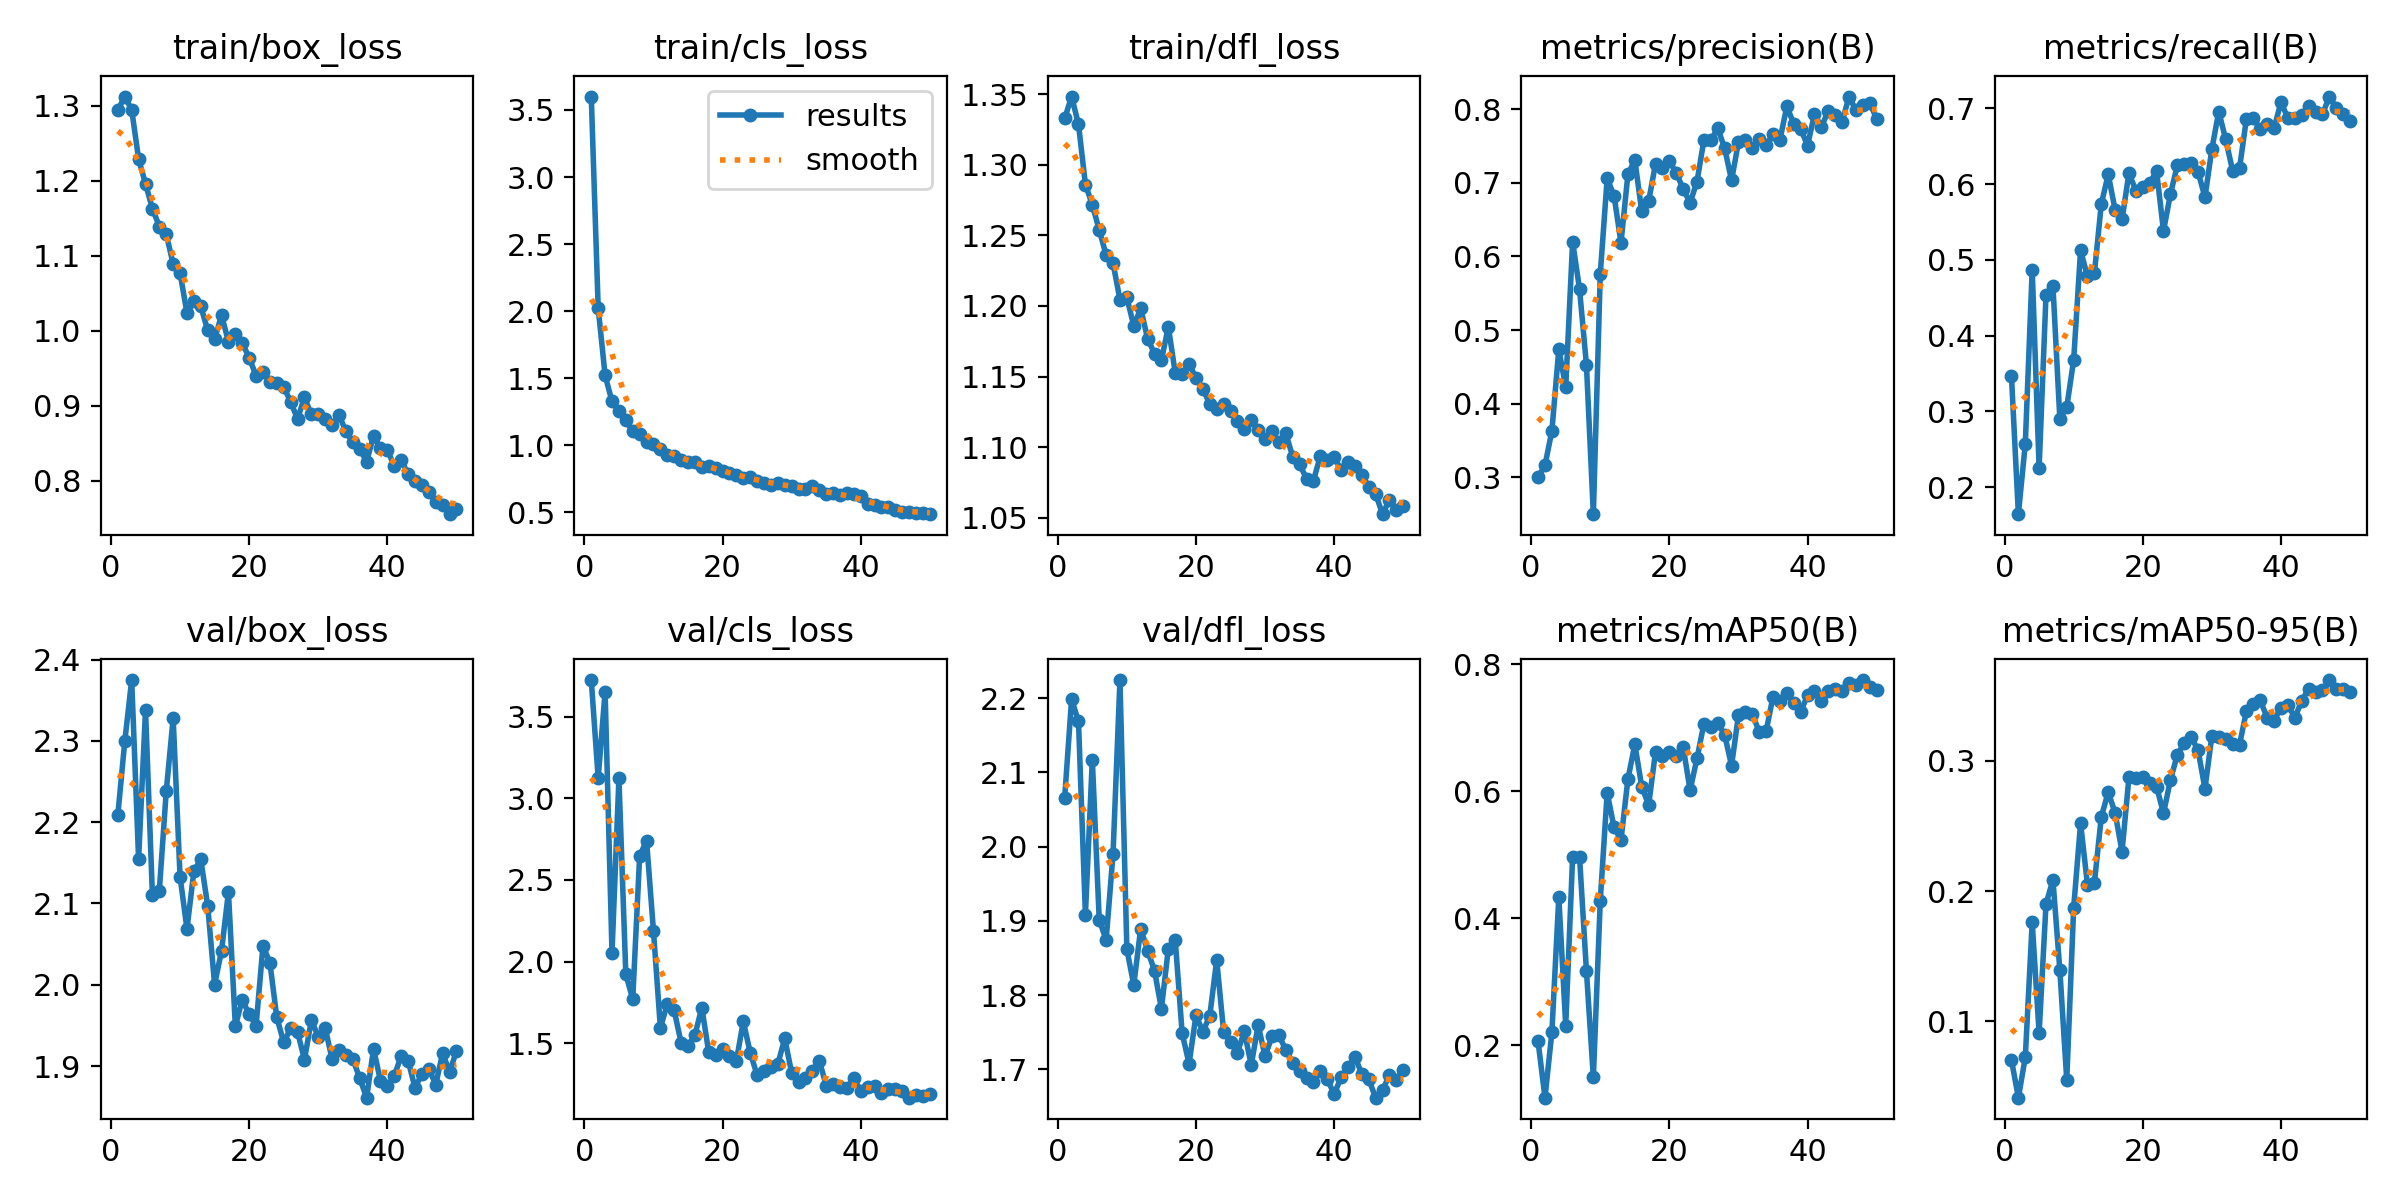

In [7]:
from IPython.display import Image
Image(filename="pothole_exp/yolov11_poc/results.png")


In [8]:
import pandas as pd
# ganti path sesuai hasil training kamu
results_path = "pothole_exp/yolov11_poc/results.csv"

# baca file CSV
df = pd.read_csv(results_path)

# tampilkan 5 baris pertama
print(df.head())

# kalau mau semua epoch
print(df.to_string())

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  153.880         1.29421         3.60027         1.33277   
1      2  280.252         1.31216         2.02420         1.34832   
2      3  407.720         1.29464         1.52170         1.32865   
3      4  533.734         1.22907         1.32790         1.28601   
4      5  658.220         1.19590         1.25338         1.27163   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.29986            0.34601           0.20576   
1               0.31625            0.16412           0.11725   
2               0.36312            0.25700           0.22041   
3               0.47390            0.48728           0.43331   
4               0.42249            0.22519           0.23078   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.07008       2.20944       3.72579       2.06606  0.000663   
1              0.04126       2.29953       3

In [9]:
metrics = df[["epoch", "metrics/precision(B)", "metrics/recall(B)",
              "metrics/mAP50(B)", "metrics/mAP50-95(B)"]]
print(metrics)


    epoch  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0       1               0.29986            0.34601           0.20576   
1       2               0.31625            0.16412           0.11725   
2       3               0.36312            0.25700           0.22041   
3       4               0.47390            0.48728           0.43331   
4       5               0.42249            0.22519           0.23078   
5       6               0.62002            0.45420           0.49678   
6       7               0.55565            0.46565           0.49666   
7       8               0.45255            0.29008           0.31666   
8       9               0.24983            0.30534           0.14919   
9      10               0.57600            0.36768           0.42766   
10     11               0.70617            0.51272           0.59755   
11     12               0.68225            0.47804           0.54289   
12     13               0.61858            0.48219           0.5

In [11]:
best_idx = df["metrics/mAP50(B)"].idxmax()
best_row = df.loc[best_idx]
print("Epoch terbaik:", best_row["epoch"])
print("Precision:", best_row["metrics/precision(B)"])
print("Recall:", best_row["metrics/recall(B)"])
print("mAP50:", best_row["metrics/mAP50(B)"])
print("mAP50-95:", best_row["metrics/mAP50-95(B)"])


Epoch terbaik: 48.0
Precision: 0.80604
Recall: 0.70102
mAP50: 0.77509
mAP50-95: 0.35539
